In [49]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [50]:
IMAGES_DIR = "../data_4/images"
LABELS_DIR = "../data_4/labels"
DIRS = ["train", "test", "val"]

OUTPUT_DIR = "../bounding_box/images/test"

LABELS = {
    0: "aegypti",
    1: "albopictus",
    2: "anopheles",
    3: "culex",
    4: "culiseta",
    5: "japonicus/koreicus"
}

The total number of training samples: 12646
The different instances present in the training data: {0: 1000, 1: 3334, 2: 1000, 3: 3312, 4: 2000, 5: 2000}


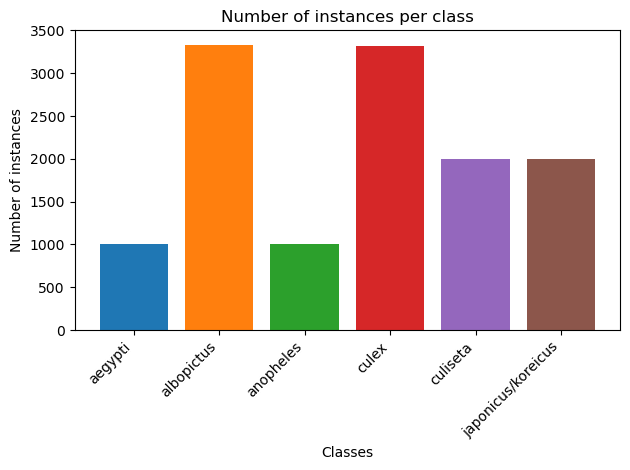

In [51]:
# Open all labels and count the number of each class

def get_labels(dir_type):
    labels = {}
    for file in os.listdir(os.path.join(LABELS_DIR, dir_type)):
        label_txt = np.loadtxt(os.path.join(LABELS_DIR, dir_type, file))
        label_val = label_txt[0].astype(int)
        if label_val in labels:
            labels[label_val] += 1
        else:
            labels[label_val] = 1
    return labels

labels_train = get_labels("train")
labels_val = get_labels("val")

labels_total = {k: labels_train.get(k, 0) + labels_val.get(k, 0) for k in set(labels_train) | set(labels_val)}

print("The total number of training samples:", np.sum(list(labels_total.values())))
print("The different instances present in the training data:", labels_total)

# Plot a histogram of the number of instances per class, give different colors to each class

plt.bar(list(labels_total.keys()), list(labels_total.values()), color=[plt.cm.tab10(i) for i in range(len(labels_total))])

plt.xlabel("Classes")
plt.ylabel("Number of instances")
plt.title("Number of instances per class")

# Put the x-ticks above the bars inside the graph

plt.xticks(list(labels_total.keys()), [LABELS[i] for i in labels_total.keys()], rotation=45, ha="right")
plt.tight_layout()

plt.show()


In [46]:
def put_bounding_box(img, img_name, labels_df):
    image = img
    label = labels_df.loc[labels_df["ImageID"] == img_name].values[0]
    
    # print(label)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    cls = label[2]
    x, y, w, h = label[4:]
    
    # Convert to bottom left corner
    x = int((x - w/2) * image.shape[1])
    y = int((y - h/2) * image.shape[0])
    
    w = int(w * image.shape[1])
    h = int(h * image.shape[0])
    
    cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # add text of label
    cv.putText(image, cls, (x, y), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)
    
    cv.imwrite(os.path.join(OUTPUT_DIR, img_name), cv.cvtColor(image, cv.COLOR_RGB2BGR))

In [47]:
output_file = "./submissions/results_test_9_fixed.csv"

import pandas as pd

output_df = pd.read_csv(output_file)

test_images = os.listdir(os.path.join(IMAGES_DIR, "test"))

In [48]:
for img in test_images:
    image = cv.imread(os.path.join(IMAGES_DIR, "test", img))
    put_bounding_box(image, img, output_df)